![Airbnb Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png)
# **Project Name**    -  AirBnb Bookings Analysis

##### **Project Type**    - EDA(Exploratory Data Analysis)
##### **Contribution**    - Individual
##### **Team Member 1 -** Shubham Kanaujiya

# **Project Summary -**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

# **GitHub Link -**

https://github.com/skanaujiya/AirBnb-Bookings-Analysis

# **Problem Statement**


The objective of this analysis is to gain meaningful insights from Airbnb booking data to understand key factors that influence bookings, identify patterns and trends, and improve decision-making for both hosts and the Airbnb platform. This involves analyzing various attributes like booking frequency, listing prices, guest preferences, location data, and reviews to uncover hidden trends that can drive business growth and improve customer experience.

#### **Define Your Business Objective?**

The primary business objective of the Airbnb bookings analysis is to optimize listing performance and enhance customer satisfaction, leading to increased bookings and revenue.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
df =  pd.read_csv("datasets/airbnb_data.csv")

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
## here we find the number of categorical and numerical values
numerical_values =  [ele for ele in df.columns if df[ele].dtype!='O']
categorical_vlues =  [ele for ele in df.columns if df[ele].dtype=='O']
print("Number of Numerical Feature:", len(numerical_values))
print("Number of Catergorical Feature:",len(categorical_vlues))

Number of Numerical Feature: 10
Number of Catergorical Feature: 6


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
int(df.duplicated().sum())

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
missing_values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

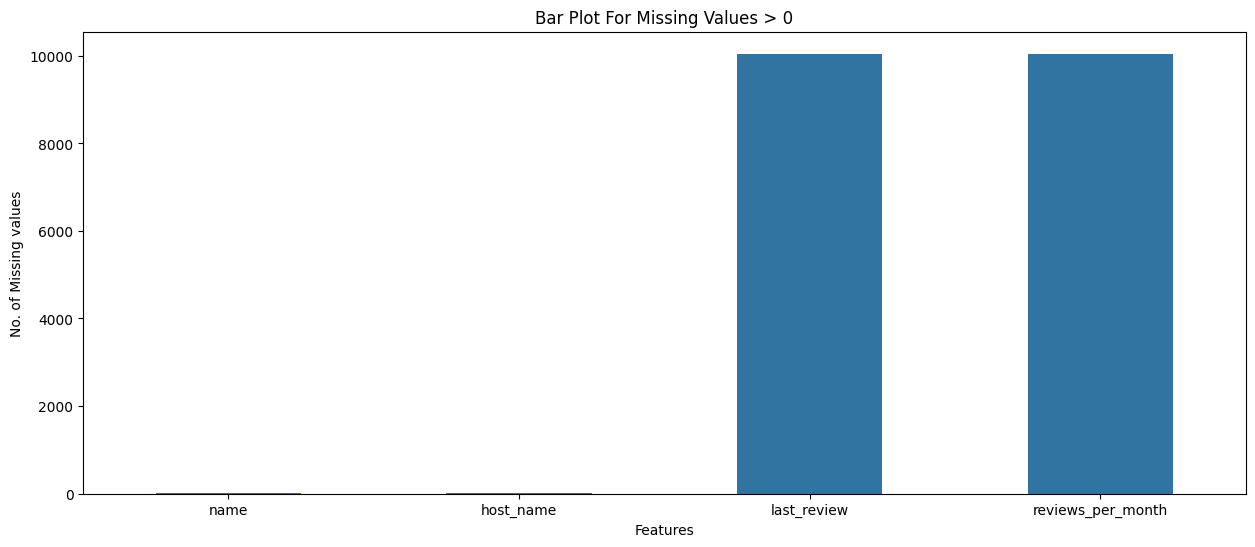

In [9]:
# Visualizing the missing values
plt.figure(figsize=(15, 6))
sns.barplot(x=[ele for ele in missing_values.keys() if missing_values[ele]>0],
             y= [ele for ele in missing_values.values if ele>0],
               width=0.5)
plt.title("Bar Plot For Missing Values > 0")
plt.xlabel("Features")
plt.ylabel("No. of Missing values")
plt.show()

### What did you know about your dataset?

- This AirBnb dataset contain the 16 columns (features) and 48895 rowns. 
- It conatins the 10 Numerical Features and 6 Categorical Features. 
- In this dataset there is no duplicate rows vlaues. But there is some columns present in the dataset that contains the Null/Na values. The columns names are given below that contains the Null/Na values.

| Column Name | NO. of NULL Value |
|----------|----------|
| name | 6 |
| host_name | 21 |
| last_review | 10052 |
| reviews_per_month | 10052 |


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [11]:
# Dataset Describe
df[numerical_values[2:]].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##### Note:- In the above statistics i have not include the id and host id because it is not needed for the analysis.

#####  Insights
- The average price of the Hotel Room/house is 152.72$ and standard deviations is 240.15$ in hotel price.
- For all hotel rooms or houses, you need to pay for a minimum of one night.
- The average number of reviews for the hotels is approximately 23, meaning each hotel is reviewed by 23 people on average. There is at least one hotel in the dataset that has a maximum rating of 629 and also some hotel or house is available with the total number of 0 reviews.
- The maximum number of reviews per month is 58.5 and average is 1.37.

### Variables Description 

- It conatins the 10 Numerical Features and 6 Categorical Features.
- But some features contain NA values, so we need to handle these values either by filling them with the mean value or by dropping the column.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [13]:
# here we basicly find out the unique value for the catregorical features
print("Ctegorical Features:", categorical_vlues)

Ctegorical Features: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [14]:
print("1. Categories in 'neighbourhood_group' variable: ",df["neighbourhood_group"].unique())
print("2. Categories in 'neighbourhood' variable: ", df["neighbourhood"].unique())
print("3. Categories in 'neighbourhood' variable: ", df["room_type"].unique())

1. Categories in 'neighbourhood_group' variable:  ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
2. Categories in 'neighbourhood' variable:  ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria

Note:- In the above code, I have identified the unique values only for the ['neighbourhood_group', 'neighbourhood', 'room_type'] columns because they play an important role in this analysis.

## 3. ***Data Wrangling***

### Data Wrangling Code

- Remove unnecessary columns 
- Re-name Column
- Handel Missing values
- Handel Duplicates

#### 3.1 Remove unnecessary columns 

In [15]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
df.drop(columns=["last_review", "reviews_per_month"], axis=1, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


#### 3.2 Re-name Column Name

In [17]:
# here i have cahnge the column name to the user friendly name
col_rename = {
'neighbourhood_group': 'location',
'neighbourhood': 'area'
}
df.rename(columns=col_rename, inplace=True)

#### 3.3 Handel Missing values

In [18]:
df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
location                           0
area                               0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [19]:
# here we know "name" and "host name" is the categorical variables 
# so for handeling this we need to drop rows that contain the NULL value or we can fill mode
df.dropna(inplace=True)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
location                          0
area                              0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### 3.4 Handel Duplicates

In [20]:
print("Total number of duplicate value:", int(df.duplicated().sum()))

Total number of duplicate value: 0


In [21]:
df.head()

,id,name,host_id,host_name,location,area,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### What all manipulations have you done and insights you found?

Basicly in the data wrangling section i have performed 4 actions:-
1. Removed the unwanted columns
2. Rename the column name
3. Removed the rows with missing values 
4. Removed the rows that contains the duplicate values ( In my case there is no duplicate row present in the dataset )

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Count Chart

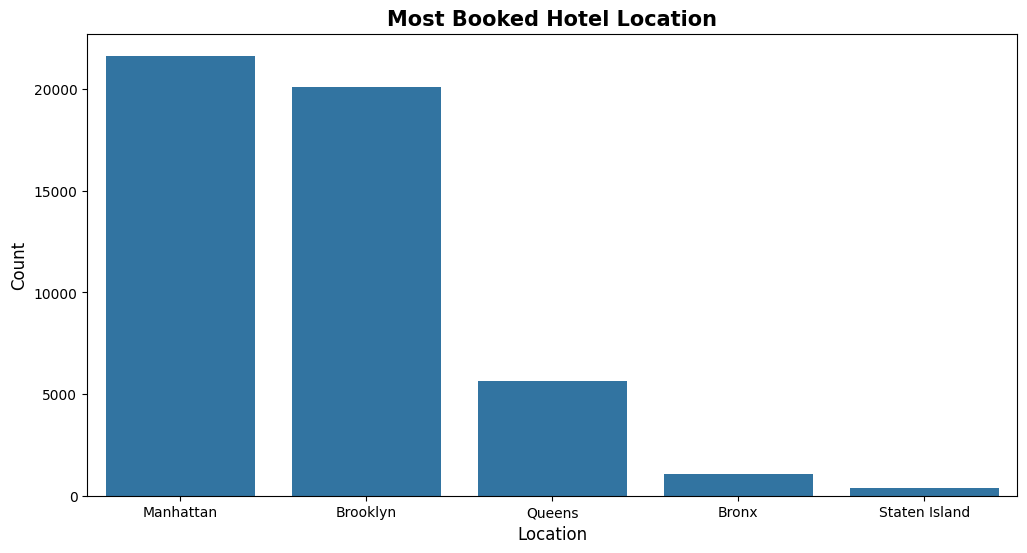

In [22]:
# so here i want to check which location is preferred by the users
plt.figure(figsize=(12, 6))
sns.countplot(x="location", data=df, order=df['location'].value_counts().index)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
## most booked hotel location
plt.title("Most Booked Hotel Location", fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

So basicly i want to know which location is most visited or preferred by the people.

##### 2. What is/are the insight(s) found from the chart?

I the above chart i have found the Manhattan is 1st location that is most visited by the people. Means that people are mostly visiting this place. And the second preference is the Brooklyn and then Queens, Bronx and Staten Island are the next preference.

| Location Name | Number of Visits (approx.) |
|----------|----------|
| Manhattan | more than 20000 |
| Brooklyn | 20000 |
| Queens | between 5000 to 10000 |
| Bronx | less than 5000 |
| Staten Island | less than Bronx |


##### 3. Will the gained insights help creating a positive business impact? 

* Gaining insights into customer behavior and preferences for hotel bookings is highly valuable.
* These insights help us to create more effective business strategies.
* Special attention is given to locations with lower booking rates to improve their performance.

#### Chart - 2 Pie Chart

In [23]:
# so here i will chcek which roomm type is preferred by the people
df["room_type"].unique() 

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Here we have total three type of unique rooms available in the hotel. Lets check which one most booked.

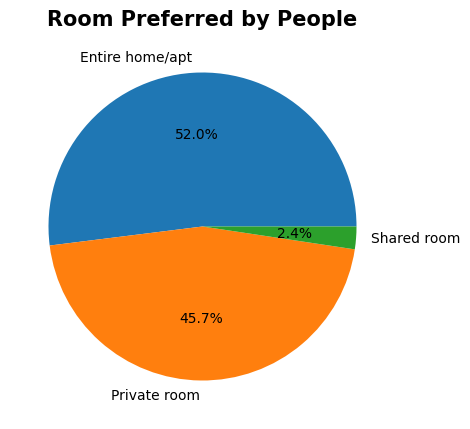

In [24]:
# plot the pie plot for the room_type
plt.figure(figsize=(5, 5))
plt.pie(df['room_type'].value_counts(), labels=df['room_type'].value_counts().index, autopct='%1.1f%%')
plt.title('Room Preferred by People', fontsize=15, fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

I chose the pie chart because it is the easiest to understand and best suited for this type of data. By using the pie chart, I created a visualization that shows the percentage of people who prefer the which type of room.

##### 2. What is/are the insight(s) found from the chart?

* Entire homes/apartments are the most preferred among the three types of room options.
* Private rooms are the second most preferred.
* Shared rooms are the least preferred.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights Leading to Negative Growth in Room Type Preference:

1.Health and Safety Concerns:
 * Shared rooms pose higher health risks due to close contact with strangers.
 * Private rooms involve shared common areas, increasing health risks.
 * Entire Homes/Apartments: Preferred for the ability to avoid contact with others, ensuring better health safety.

2.Privacy Issues:
* Shared Rooms: Minimal privacy.
* Private Rooms: Shared spaces with hosts or other guests.
* Entire Homes/Apartments: Complete privacy, making them more desirable.

3.Economic Factors:
* Shared and Private Rooms: Budget constraints might not drive preference if value for privacy and comfort in entire homes/apartments is higher.
* Entire Homes/Apartments: Perceived as offering better value despite higher costs.

#### Chart - 3 Bar Plot

In [25]:
host_by_location = df.groupby(['host_name','location'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_by_location .sort_values(by = 'calculated_host_listings_count',ascending=False).head(5)

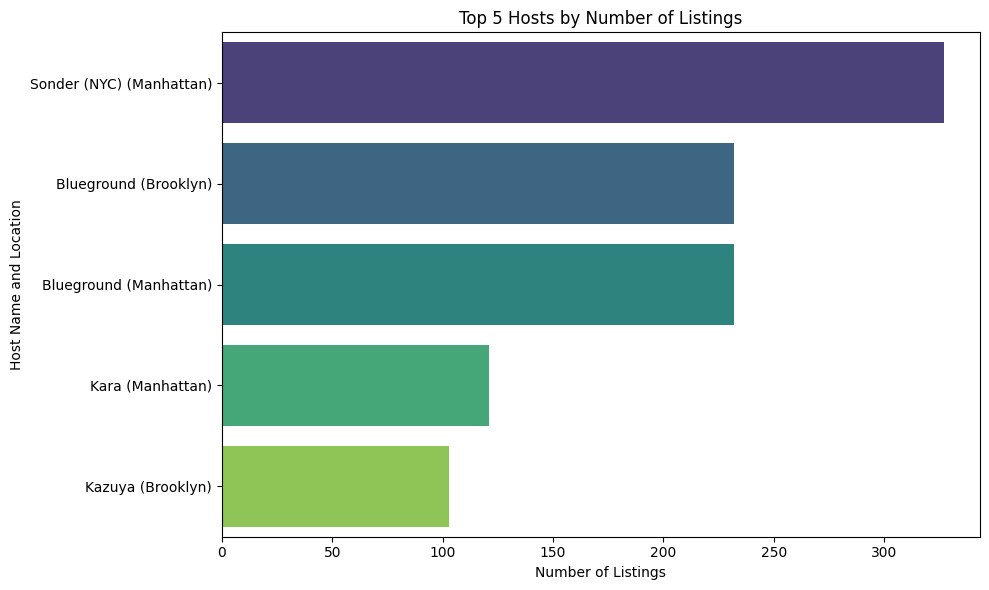

In [26]:
# Concatenate host_name and location for labels
top_hosts['host_and_location'] = top_hosts['host_name'] + " (" + top_hosts['location'] + ")"

plt.figure(figsize=(10, 6))
sns.barplot(x='calculated_host_listings_count', y='host_and_location', data=top_hosts, palette='viridis', hue='host_and_location')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name and Location')
plt.title('Top 5 Hosts by Number of Listings')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Shows booking frequency: Clearly displays how many times each hotel location is booked.

##### 2. What is/are the insight(s) found from the chart?

I found that Host name **Sonder (NYC)** has highest number of listings in **Manhattan** followed by Bluground.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
*  Focus on High Performers: Identifying top hosts allows targeted promotions and resource allocation.
*  Increased Revenue: More revenue from more successful hosts.
*  Popular Locations: Helps guide expansion and marketing strategies.

Negative Impact:
*  Market Saturation: Concentration in popular areas may reduce profitability and increase competition.
* Ignoring Regional Disparities: Overlooking less successful regions can miss opportunities for growth.


#### Chart - 4 Scatter Plot 1

In [27]:
# Group by location and room_type to get the maximum price
highest_price_df = df.groupby(['location', 'room_type'])['price'].max().reset_index()
# Group by location and room_type to get the average price
average_price_df = df.groupby(['location', 'room_type'])['price'].mean().reset_index()

# Rename columns for clarity
highest_price_df.rename(columns={'price': 'highest_price'}, inplace=True)
average_price_df.rename(columns={'price': 'average_price'}, inplace=True)

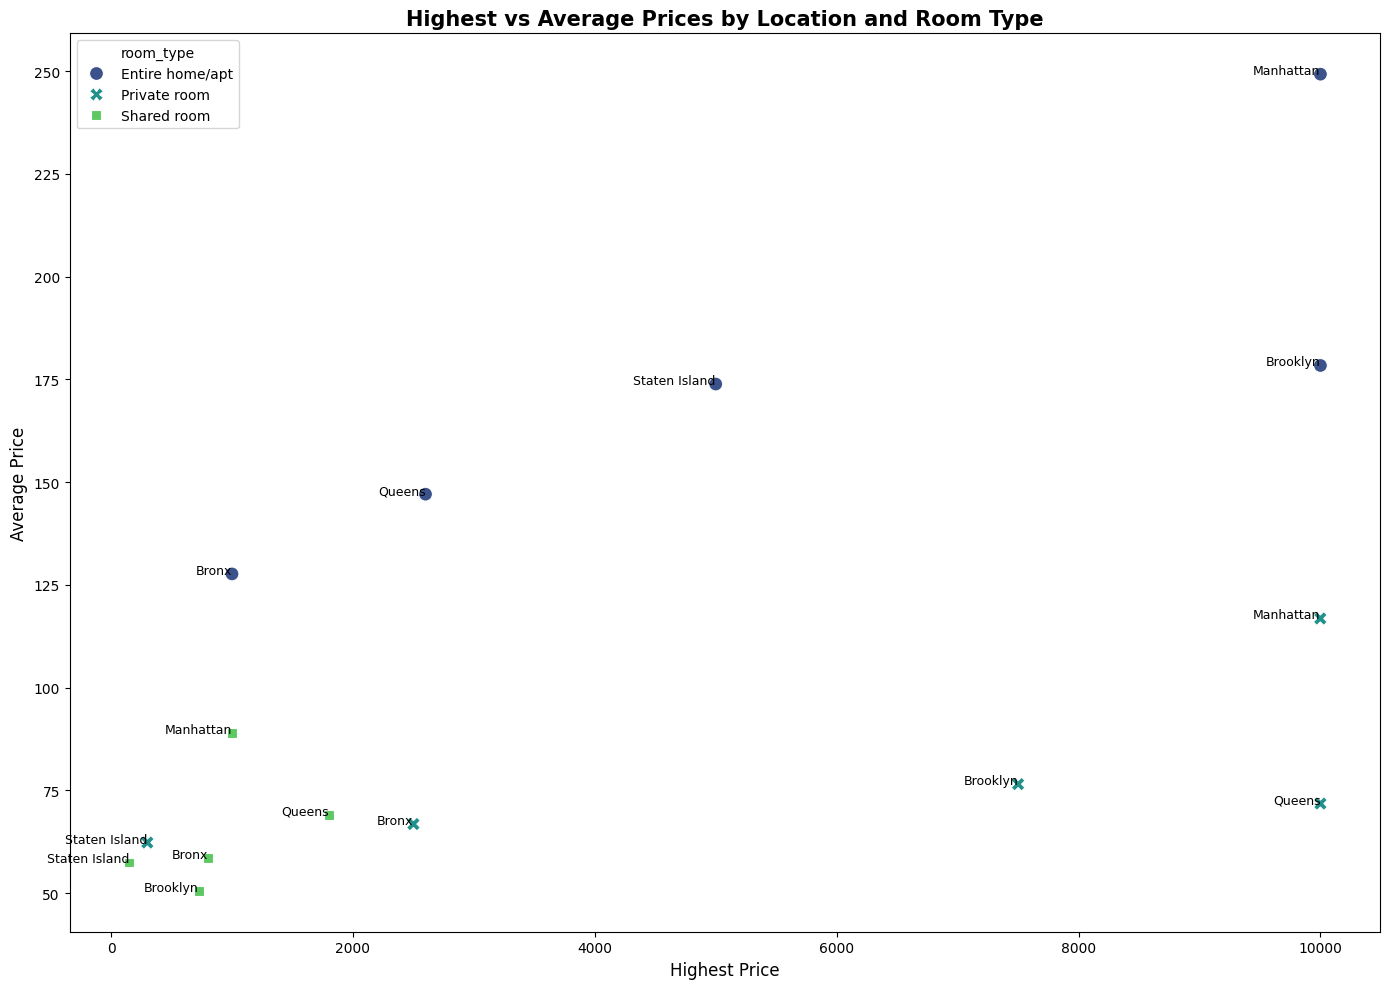

In [28]:
# Merge the dataframes
merged_df = pd.merge(highest_price_df, average_price_df, on=['location', 'room_type'])

# Create a scatter plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=merged_df, x='highest_price', y='average_price', hue='room_type', style='room_type', palette='viridis', s=100)

# Annotate each point with its location
for i in range(merged_df.shape[0]):
    plt.text(merged_df['highest_price'].iloc[i], 
             merged_df['average_price'].iloc[i], 
             merged_df['location'].iloc[i], 
             fontsize=9, 
             ha='right')

# Set labels and title
plt.xlabel('Highest Price', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Highest vs Average Prices by Location and Room Type', fontsize=15, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

1. **Comparison:** Scatter plot compares highest and average prices effectively.
2. **Clarity:** Shows relationships and trends clearly, with annotations for context.
3. **Categorization:** Differentiates room types by color and marker style.

##### 2. What is/are the insight(s) found from the chart?

* Price Correlation: Examine if higher highest prices are associated with higher average prices or if there's any pattern or trend.

* Room Type Comparison: Compare how different room types relate in terms of highest and average prices.

* Location Insights: Identify which locations have extreme values or notable differences between highest and average prices.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

    Targeted Pricing: Helps set competitive prices.
    Optimized Offerings: Guides improvements in room types.
    Strategic Investment: Informs decisions for expansion and marketing.

Negative Impact:

    Overpricing Risks: High discrepancies might indicate overpricing.
    Market Saturation: High prices could lead to reduced demand.
    Neglect of Low Prices: Ignoring lower-price segments can miss growth opportunities.

#### Chart - 5 Scatter Plot 2

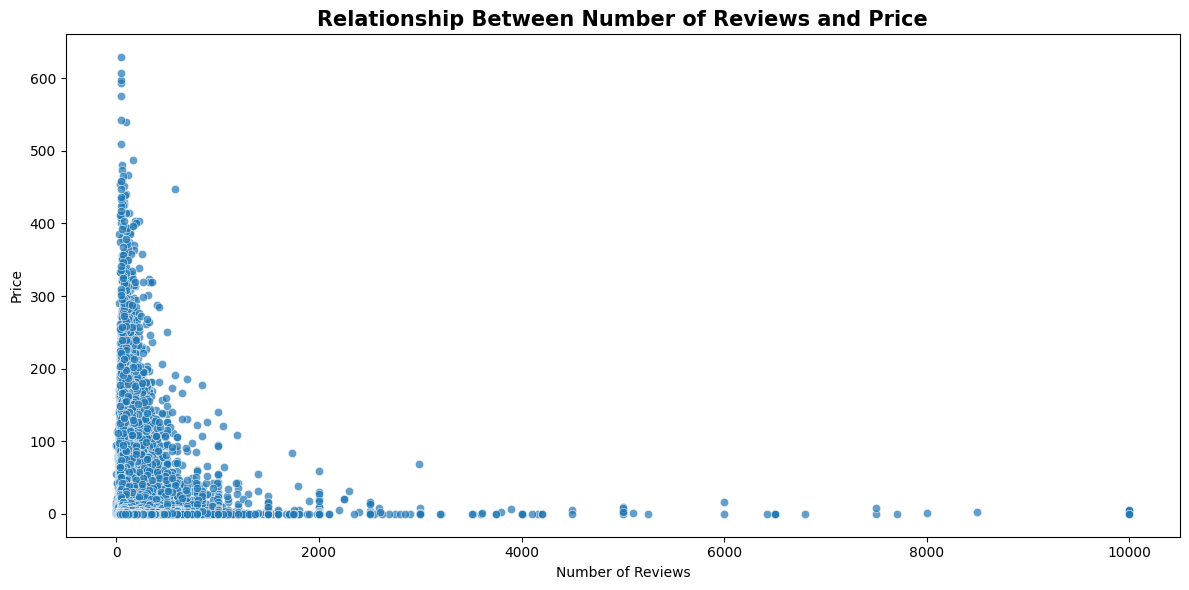

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y='number_of_reviews', x='price', data=df, alpha=0.7)

# Set labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Relationship Between Number of Reviews and Price', fontsize=15, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

From the above visualization, we can say that most people prefer to stay in lower-priced hotels or room types, and the reviews are higher for those types of hotels or rooms.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

    Attract More Customers: Offering more budget-friendly options can increase bookings.
    Improve Reputation: High reviews for lower-priced rooms suggest satisfied customers.

Negative Impact:

    Lower Profit Margins: Focusing too much on low prices can reduce profitability.
    Miss Premium Market: Ignoring higher-priced options can lead to lost opportunities with high-value customers.

#### Chart - 6 Stacked Bar Plot

In [30]:
# Group by 'host_id', 'host_name', and 'room_type', and sum the 'number_of_reviews' for each host and room type
busiest_hosts = df.groupby(['host_id', 'host_name', 'room_type'])['number_of_reviews'].max().reset_index()
top_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
top_hosts

,host_id,host_name,room_type,number_of_reviews
24474,47621202,Dona,Private room,629
7706,4734398,Jj,Private room,607
22203,37312959,Maya,Private room,543
4589,2369681,Carol,Private room,540
19436,26432133,Danielle,Private room,510
13704,12949460,Asa,Entire home/apt,488
1974,792159,Wanda,Private room,480
5055,2680820,Linda,Private room,474
161,42273,Dani,Entire home/apt,467
18283,23591164,Angela,Private room,466


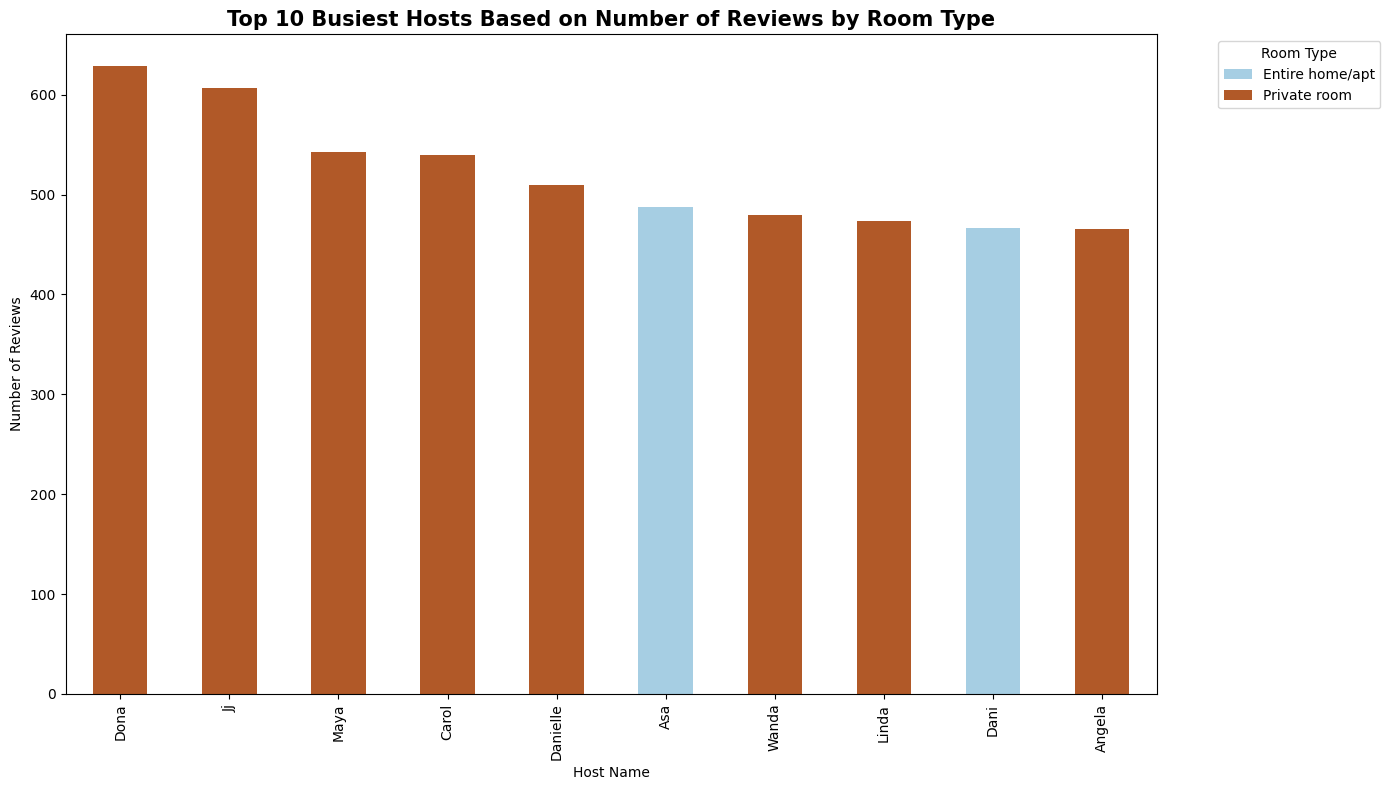

In [31]:
# Pivot the DataFrame for a stacked bar plot
top_hosts_pivot = top_hosts.pivot(index='host_name', columns='room_type', values='number_of_reviews').fillna(0)

# Sort the pivot DataFrame by the total number of reviews in descending order
top_hosts_pivot = top_hosts_pivot.loc[top_hosts_pivot.sum(axis=1).sort_values(ascending=False).index]

# Create a stacked bar plot
top_hosts_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap = 'Paired')

# Set labels and title
plt.xlabel('Host Name')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Busiest Hosts Based on Number of Reviews by Room Type', fontsize=15, fontweight='bold')

# Adjust legend
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The stacked bar plot provides a clear comparison of total reviews by host and shows the distribution of reviews across different room types.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we can clearly see that **Dona** is the busiest host among the top 10 hosts, based on the highest number of reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

    Target Marketing: Promotes the busiest host to boost bookings.
    Resource Allocation: Helps in effective support and resource distribution.

Negative Impact:

    Neglect of Other Hosts: Over-focus on one host can lead to missed opportunities with others.
    Market Saturation: High popularity might risk decreased demand if quality declines.

#### Chart - 7  Line Plot

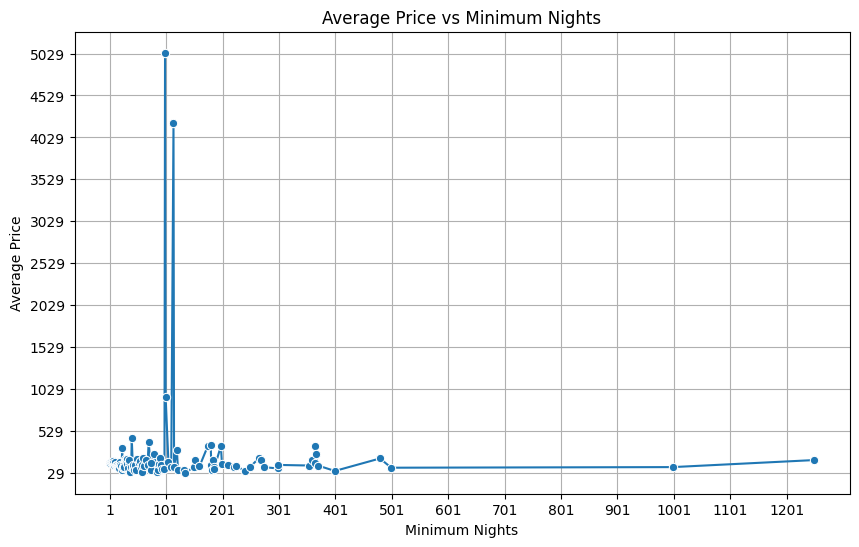

In [32]:
# Calculate average price by minimum nights
avg_price = df.groupby('minimum_nights')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='minimum_nights', y='price', data=avg_price, marker='o')
plt.title('Average Price vs Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Average Price')
x_min = df['minimum_nights'].min()
x_max = df['minimum_nights'].max()
plt.xticks(np.arange(x_min, x_max + 1, step=100))  
y_min = avg_price['price'].min()
y_max = avg_price['price'].max()
plt.yticks(np.arange(y_min, y_max + 1, step=500))  
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot effectively displays trends over a continuous variable. It allows you to see how average prices change as the minimum number of nights increases, making it easy to identify upward or downward trends.

##### 2. What is/are the insight(s) found from the chart?

The minimum nights range from 1 to 103 days, with the average price ranging from $29 to $529 and minimal outliers or exceptions in pricing. This indicates that competition is very high, as the range is quite tight and the average price is relatively low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact Insights

    Optimized Pricing: Longer stays may lead to higher prices, boosting revenue.
    Targeted Marketing: Tailoring marketing to specific guest demographics can increase bookings.
    Enhanced Listings: Highlighting sought-after amenities can attract more guests.

Potential Negative Growth Insights

    High Minimum Stays: Longer requirements may reduce bookings due to lack of flexibility.
    Price Sensitivity: Higher prices could deter guests, lowering revenue.
    Market Saturation: Similar listings can lead to competition and lower profit margins.

#### Chart - 8 Hexbin Plot

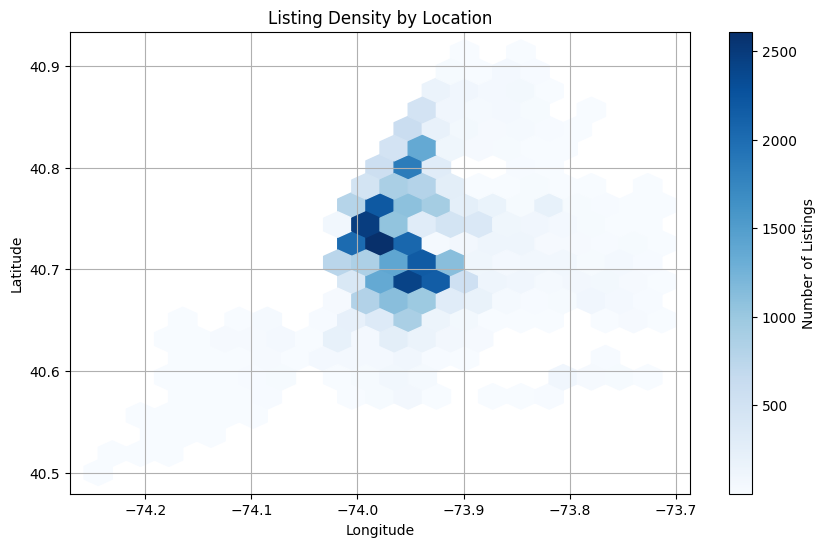

In [33]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.hexbin(df['longitude'], df['latitude'], gridsize=20, cmap='Blues', mincnt=1)
plt.colorbar(label='Number of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Listing Density by Location')
plt.show()

##### 1. Why did you pick the specific chart?

This plot shows the density of listings across different regions, highlighting areas with the most and least number of listings.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that most bookings occur in the region with latitude 40.6 to 40.7 and longitude -74.0 to -73.9. This indicates that this area is the most popular and busiest location.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

    Hotspots: Focus marketing on popular locations to boost revenue.
    Targeted Campaigns: Tailored promotions can increase bookings.
    Customized Services: Localized offerings enhance guest satisfaction.

Potential Negative Growth

    Over-Saturation: More listings may lower prices and profits.
    Market Vulnerability: Reliance on specific areas risks revenue loss.
    Missed Opportunities: Neglecting less popular locations can limit growth.

#### Chart - 9 Bar Plot

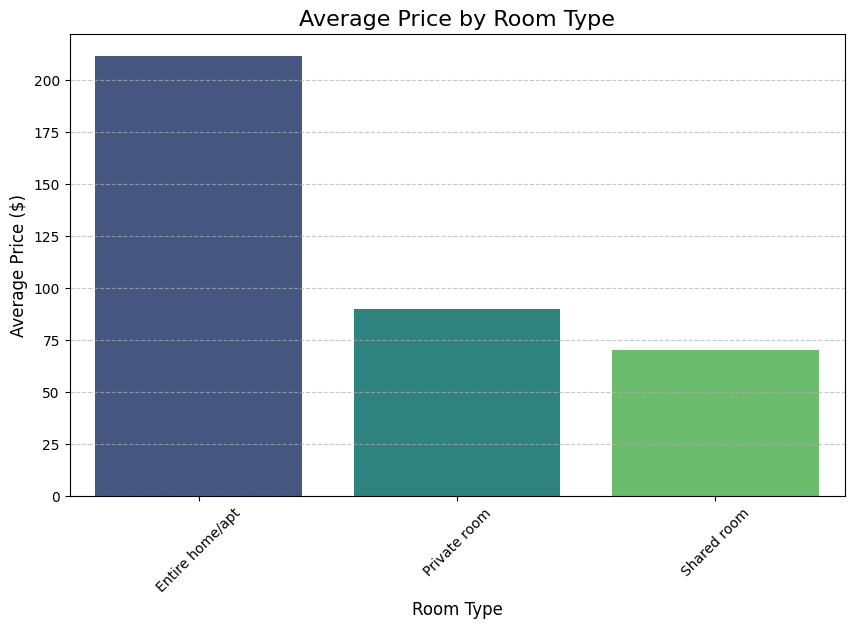

In [34]:
# Calculate average prices by room type
avg_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()

# Calculate average prices by room type
avg_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_room_type, x='room_type', y='price', hue='room_type', palette='viridis', legend=False)

# Add titles and labels
plt.title('Average Price by Room Type', fontsize=16)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('Room Type', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose the bar plot for its clarity and simplicity in comparing average prices across room types, making it visually appealing and easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

The insight reveals that the "Entire Home/Apt" category has the highest average price among all room types, followed by "Private Room" and "Shared Room," indicating varying demand and value perceptions across these accommodations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

    Targeted Pricing: Insights can guide pricing strategies for "Entire Home/Apt" to maximize revenue.
    Investment Focus: Data on room types helps allocate resources effectively for high-demand categories.

Negative Growth Insights

    Overpricing Risks: High prices for "Entire Home/Apt" may reduce occupancy.
    Market Saturation: Oversupply of "Private Rooms" and "Shared Rooms" can lead to lower prices and profits.

#### Chart - 10 Joint Plot

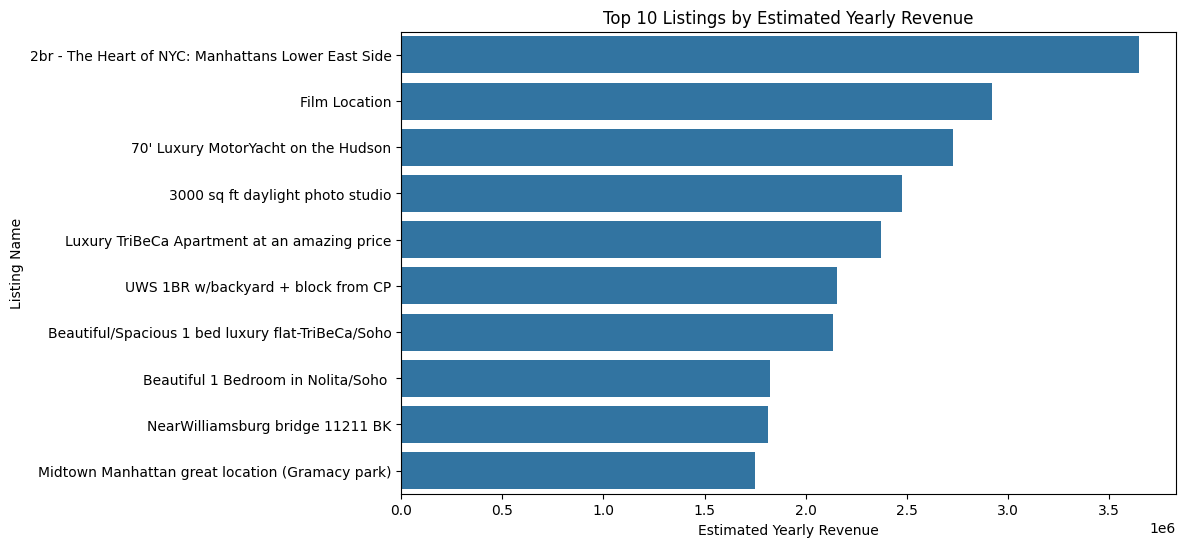

In [35]:
# Chart - 10 visualization code
df['estimated_revenue'] = df['price'] * df['availability_365']
top_revenue_listings = df[['name', 'estimated_revenue']].sort_values(by='estimated_revenue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='estimated_revenue', y='name', data=top_revenue_listings, orient='h')
plt.title('Top 10 Listings by Estimated Yearly Revenue')
plt.xlabel('Estimated Yearly Revenue')
plt.ylabel('Listing Name')
plt.show()


##### 1. Why did you pick the specific chart?

Calculating potential revenue helps evaluate which listings are performing well and could guide decisions about pricing or promotional efforts.

##### 2. What is/are the insight(s) found from the chart?

The highest revenue is generated by the **2br - The Heart of NYC.Manhattan Lower East Side** and followed by Film Location.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact

    Targeted Marketing: Focus on high-revenue listings.
    Benchmarking: Set targets based on top performers.

Negative Insights

    Overreliance: Risk of revenue loss if key listings decline.
    Saturation: Increased competition may lower prices.

#### Chart - 11

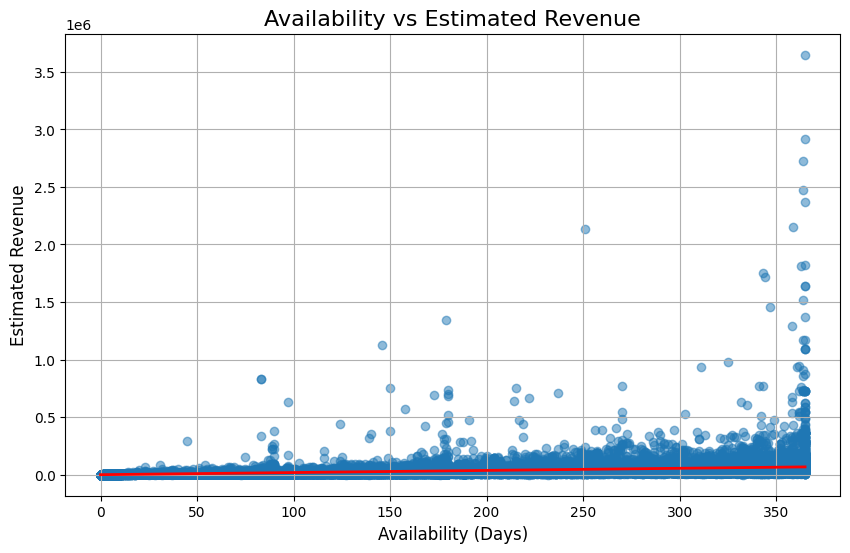

In [44]:
# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='availability_365', y='estimated_revenue', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red', 'linewidth': 2})

# Add titles and labels
plt.title('Availability vs Estimated Revenue', fontsize=16)
plt.xlabel('Availability (Days)', fontsize=12)
plt.ylabel('Estimated Revenue', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Helps determine if keeping listings available longer directly translates into higher revenue.

##### 2. What is/are the insight(s) found from the chart?

If we look at the best-fit line in the graph above, we can see that there is a linear relationship between revenue and the availability of the rooms. Ignoring the outliers, the best-fit line appears straight. However, the graph indicates that most hotels and apartments generate less revenue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

    Informed Decisions: Insights on the revenue-availability relationship can enhance pricing and marketing strategies.
    Resource Allocation: Highlights the need to increase availability for higher revenue.

Negative Growth Insights

    Quality Risks: Increasing availability without improving quality may harm guest experiences.
    Market Saturation: Oversupply could lead to lower prices and reduced profitability.

#### Chart - 12

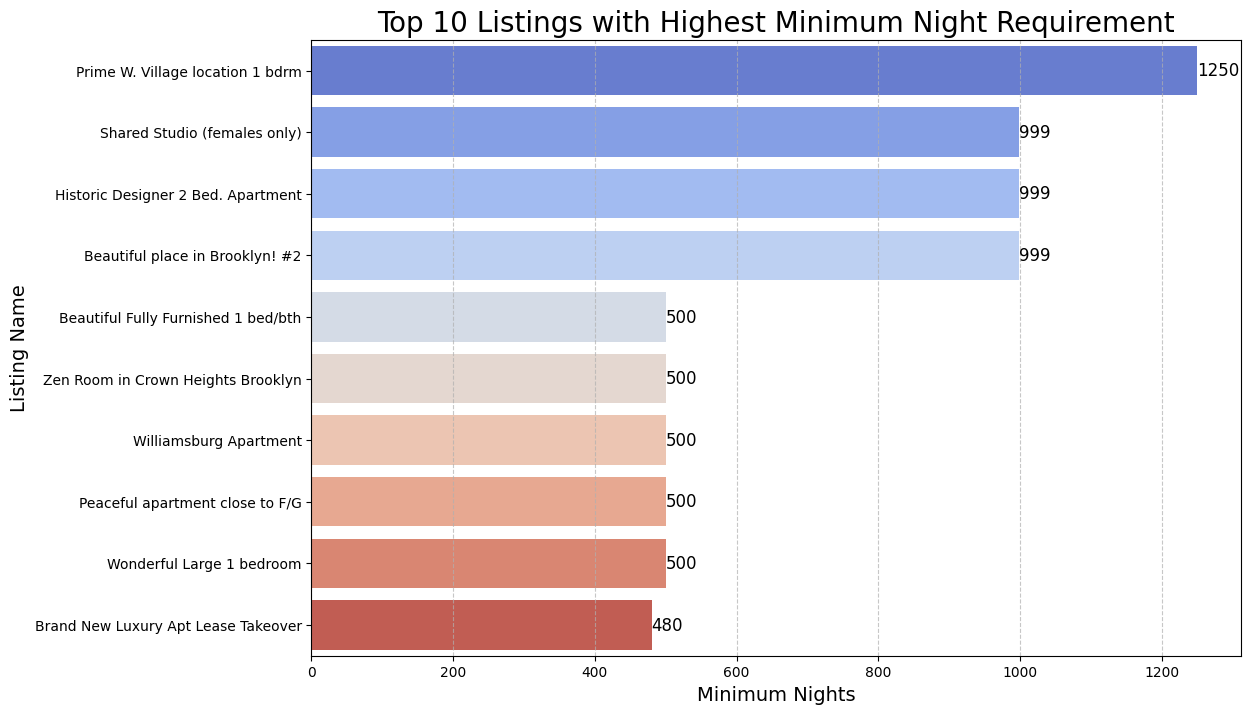

In [43]:
# Prepare the data
top_minimum_nights = df[['name', 'minimum_nights']].sort_values(by='minimum_nights', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='minimum_nights', y='name', data=top_minimum_nights, hue='name',palette='coolwarm', orient='h')

# Add titles and labels
plt.title('Top 10 Listings with Highest Minimum Night Requirement', fontsize=20)
plt.xlabel('Minimum Nights', fontsize=14)
plt.ylabel('Listing Name', fontsize=14)

# Add data labels on the bars
for index, value in enumerate(top_minimum_nights['minimum_nights']):
    barplot.text(value, index, f'{value}', va='center', fontsize=12)

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Shows which listings require the longest stays, potentially indicating luxury or specialized listings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

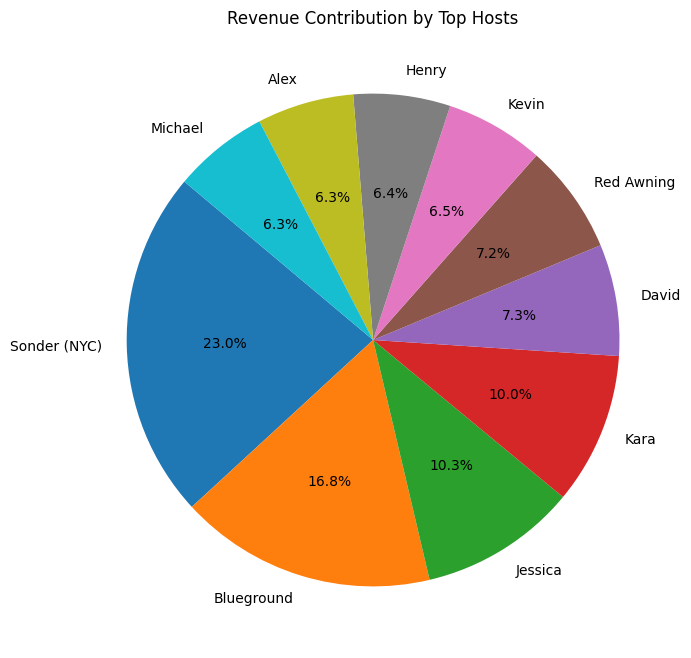

In [38]:
revenue_by_host = df.groupby('host_name')['estimated_revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_host, labels=revenue_by_host.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution by Top Hosts')
plt.show()

##### 1. Why did you pick the specific chart?

This chart will highlight hosts who are generating the most estimated revenue and can help prioritize business relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [39]:
# Correlation Heatmap visualization code
"""
so here basicly i will how much the price is dependent on the room type, location, area, number of
reviews, availability.
"""
selected_columns = ['price', 'area', 'location', 'number_of_reviews', 'availability_365', 'room_type', 'calculated_host_listings_count']
df_copy  = df[selected_columns]
df_copy.head()

,price,area,location,number_of_reviews,availability_365,room_type,calculated_host_listings_count
0,149,Kensington,Brooklyn,9,365,Private room,6
1,225,Midtown,Manhattan,45,355,Entire home/apt,2
2,150,Harlem,Manhattan,0,365,Private room,1
3,89,Clinton Hill,Brooklyn,270,194,Entire home/apt,1
4,80,East Harlem,Manhattan,9,0,Entire home/apt,1


In [40]:
## so have some catergrical varriables we need to convert to numerical for the correlation
## so here i will use the encoding method
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_copy['area'] = encoder.fit_transform(df_copy['area'])
df_copy['room_type'] = encoder.fit_transform(df_copy['room_type'])
df_copy['location'] = encoder.fit_transform(df_copy['location'])
df_copy.head()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_7784\3386396214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['area'] = encoder.fit_transform(df_copy['area'])
C:\Users\Shubham\AppData\Local\Temp\ipykernel_7784\3386396214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['room_type'] = encoder.fit_transform(df_copy['room_type'])
C:\Users\Shubham\AppData\Local\Temp\ipykernel_7784\3386396214.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,price,area,location,number_of_reviews,availability_365,room_type,calculated_host_listings_count
0,149,108,1,9,365,1,6
1,225,127,2,45,355,0,2
2,150,94,2,0,365,1,1
3,89,41,1,270,194,0,1
4,80,61,2,9,0,0,1


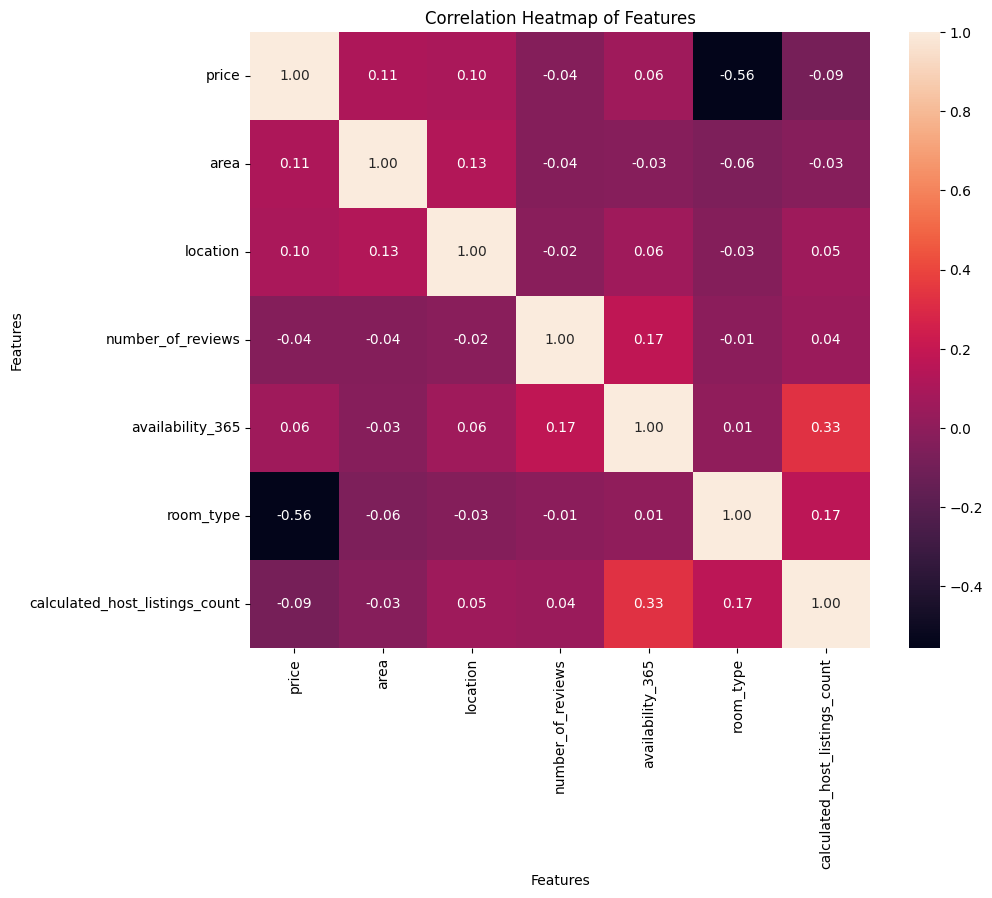

In [41]:
corr_matrix = df_copy.corr(method= 'kendall')

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the figure
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

# Add titles and labels
plt.title('Correlation Heatmap of Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Because Heatmap relationships and strength of associations clearly through color gradients. It provides a compact and intuitive way to assess how different features interact with each other.

##### 2. What is/are the insight(s) found from the chart?

I can clearly see that the price is not much correlated with location and area, but it is highly correlated with room type.

#### Chart - 15 - Pair Plot 

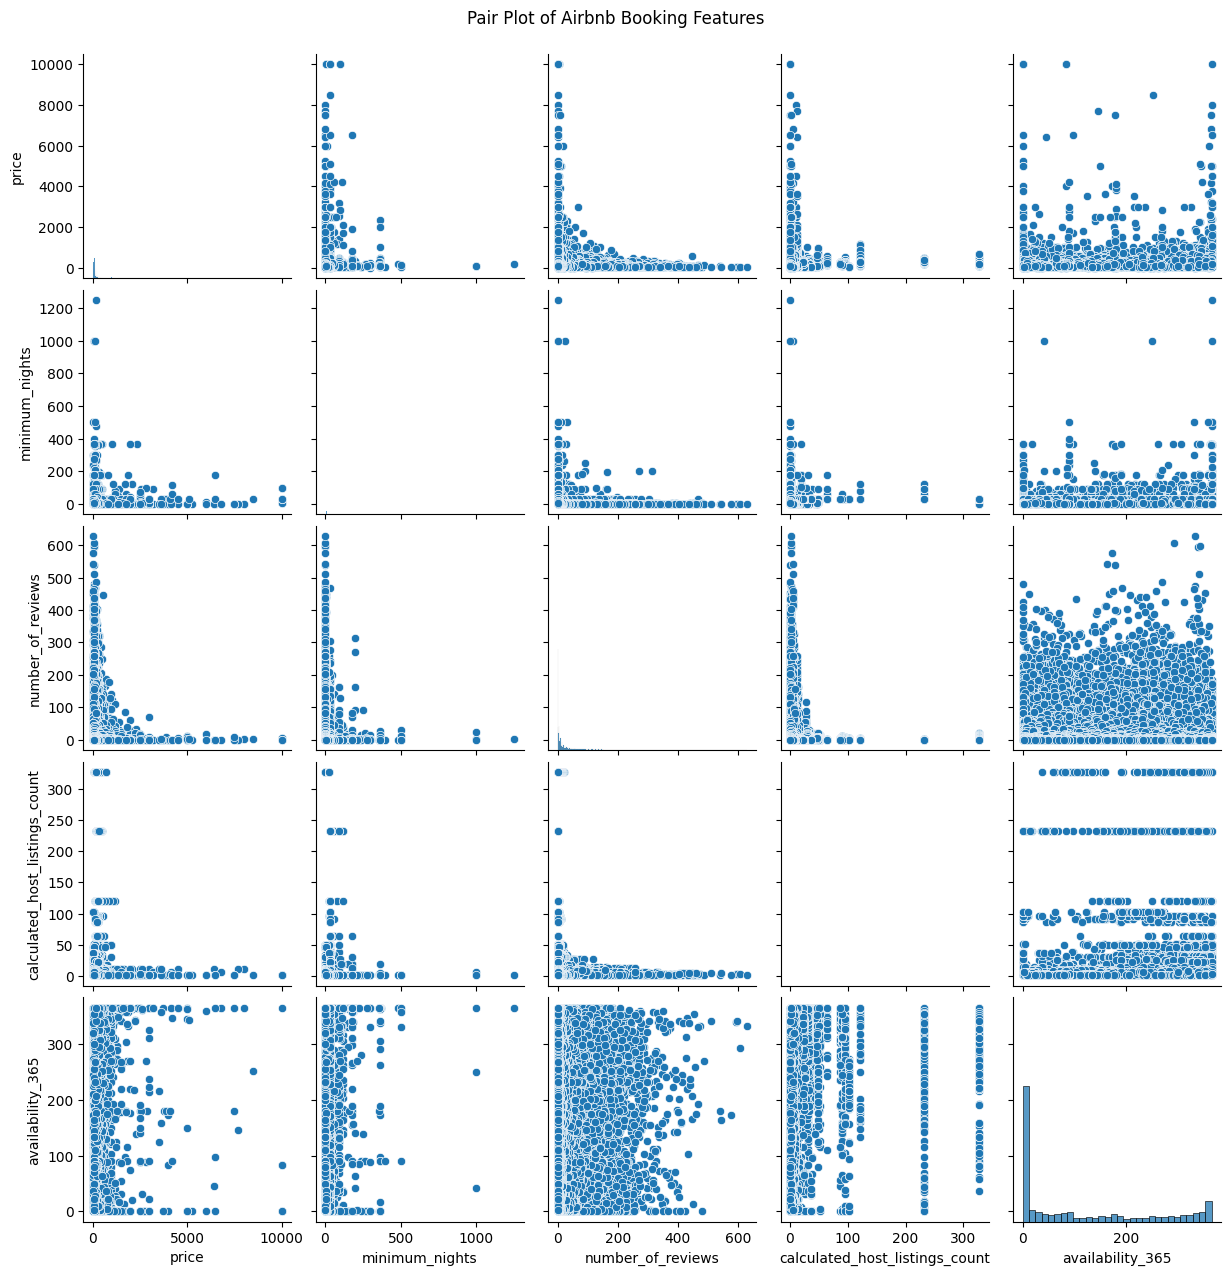

In [42]:
# Pair Plot visualization code
new_df = df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
# Create a pair plot
sns.pairplot(new_df)
plt.suptitle('Pair Plot of Airbnb Booking Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***